In [3]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
from typing import Dict, Callable, Sequence, Any, Union

In [4]:
def eulerIntegrate(dX: Callable, X0: float, dt: float, max_t:float = 1000, **params):
    steps = int(max_t / dt)
    X = []
    t = []
    t0 = 0
    Xval = X0
    tVal = t0
    for i in jnp.linspace(0, max_t, steps):
        t.append(tVal)
        X.append(Xval)
        Xval += dX(X0=X0, dt=dt, X=Xval, t=tVal, **params) * dt
        tVal += dt
    return jnp.array(t), jnp.array(X)

def plotDiff(dX: Callable, X0: float, dt: float, max_t:float = 1000, **params):
    # Integrate the system
    t, X = eulerIntegrate(dX, X0, dt, max_t, **params)
    plt.plot(t, X)

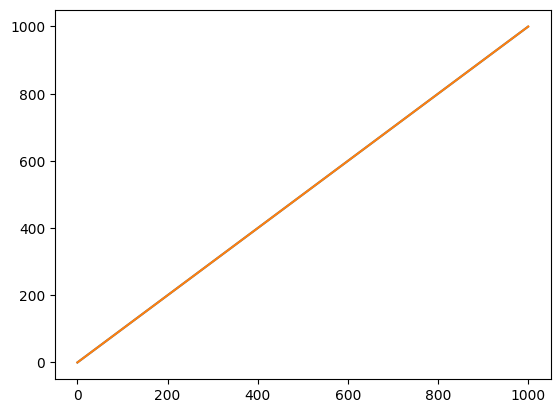

In [12]:
# Simple diffusion equation for constant speed
# dX = c dt + X0
def dX(dt: float, X0: float, c: float = 1, **params) -> float:
    return c * dt + X0

plotDiff(dX=dX, X0=0, dt=1, c=1)
# Plot the actual solution
t = jnp.linspace(0, 1000, 1000)
X = t + 0
plt.plot(t, X)

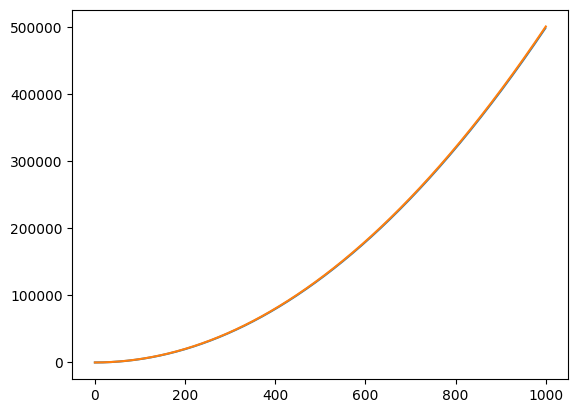

In [14]:
# Simple diffusion equation for increasing speed with constant rate (constant acceleration)
# dX = X0 + t * dt
def dX(dt: float, X0: float, t: float, c: float = 1, **params) -> float:
    return X0 + t * c * dt 

plotDiff(dX=dX, X0=0, dt=1, c=1, a=0.1)
# Plot the actual solution
t = jnp.linspace(0, 1000, 1000)
X = 0.5 * t**2 + t
plt.plot(t, X)

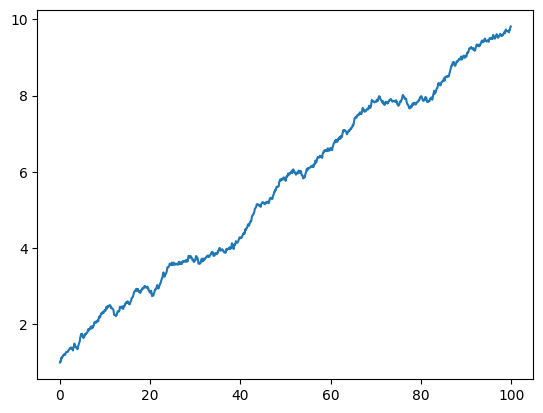

In [16]:
global randkey
randkey = jax.random.PRNGKey(4)

def dW(t: float, **params) -> float:
    # Brownian motion with variance t
    global randkey
    randkey, subkey = jax.random.split(randkey)
    return jax.random.normal(subkey) * jnp.sqrt(t)

def a(X: float, t: float) -> float:
    return 0.9

def b(X: float, t: float) -> float:
    return 1

# A simple diffusion differential equation
# Given by dX = a(X(t), t) dt + b(X(t), t) dW(t)
def dX(X: float, t: float, dt: float, **params) -> float:
    return a(X, t) * dt  + b(X, t) * dW(dt)

plotDiff(dX=dX, X0=1, dt=0.1, max_t=100)